# Kaggle

## Ideas previas

Mi dataset contiene datos de generacion de energia de paneles solares y datos meteorologicos en una franja de 34 dias.

Mi idea es intentar predecir la generacion de energia del panel a partir de los datos meteorilogicos. También quiero intentar utilizar los datos de tiempo (Y-m-d **H:i**) para ver si ayuda o no a hacer las predicciones.


Lo que he hablado con el profe:

Mirar de hacer predicciones de cuanto genera cada dia segun las temperaturas (media, min, max, cuartiles).

Si cada dia es demasiado tiempo (solo hay 34 dias), mirar de hacerlo cada hora o cada unas pocas horas.


## Importar y preparar datos

Para hacer pruebas, importo el dataset de la Planta 1.

In [1]:
import pandas as pd

dataset_generation = pd.read_csv('datasets/Plant_1_Generation_Data.csv')
dataset_weather = pd.read_csv('datasets/Plant_1_Weather_Sensor_Data.csv')

In [2]:
dataset_generation.info()
print()
dataset_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   flo

In [3]:
dataset_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
dataset_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
dataset_generation['DATE_TIME'] = pd.to_datetime(dataset_generation['DATE_TIME'], format='%d-%m-%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
dataset_weather['DATE_TIME'] = pd.to_datetime(dataset_weather['DATE_TIME']).dt.strftime('%Y-%m-%d %H:%M')

In [6]:
dataset_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [7]:
dataset_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
full_dataset = pd.merge(dataset_weather, dataset_generation, on=['DATE_TIME', 'PLANT_ID'])
full_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68774 entries, 0 to 68773
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            68774 non-null  object 
 1   PLANT_ID             68774 non-null  int64  
 2   SOURCE_KEY_x         68774 non-null  object 
 3   AMBIENT_TEMPERATURE  68774 non-null  float64
 4   MODULE_TEMPERATURE   68774 non-null  float64
 5   IRRADIATION          68774 non-null  float64
 6   SOURCE_KEY_y         68774 non-null  object 
 7   DC_POWER             68774 non-null  float64
 8   AC_POWER             68774 non-null  float64
 9   DAILY_YIELD          68774 non-null  float64
 10  TOTAL_YIELD          68774 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.3+ MB


In [9]:
full_dataset.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [10]:
clean_dataset = full_dataset.drop(['PLANT_ID', 'SOURCE_KEY_x', 'SOURCE_KEY_y'], axis=1)
clean_dataset.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,7158964.0


## Visualizar los datos

/tmp/ipykernel_7417/857220704.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_dataset.corr(), annot=True)


<AxesSubplot:>

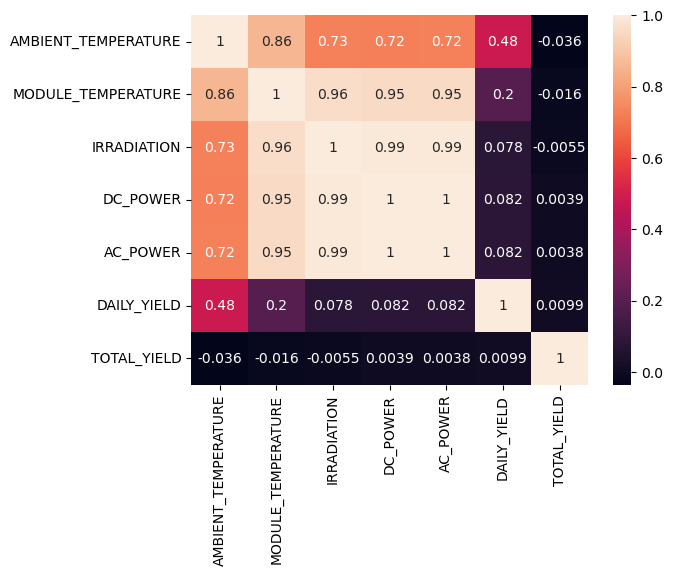

In [11]:
import seaborn as sns

sns.heatmap(clean_dataset.corr(), annot=True)

Hay demasiada buena correlacion entre AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION y AC_POWER, DC_POWER. Seria muy facil hacer una regresión lineal.

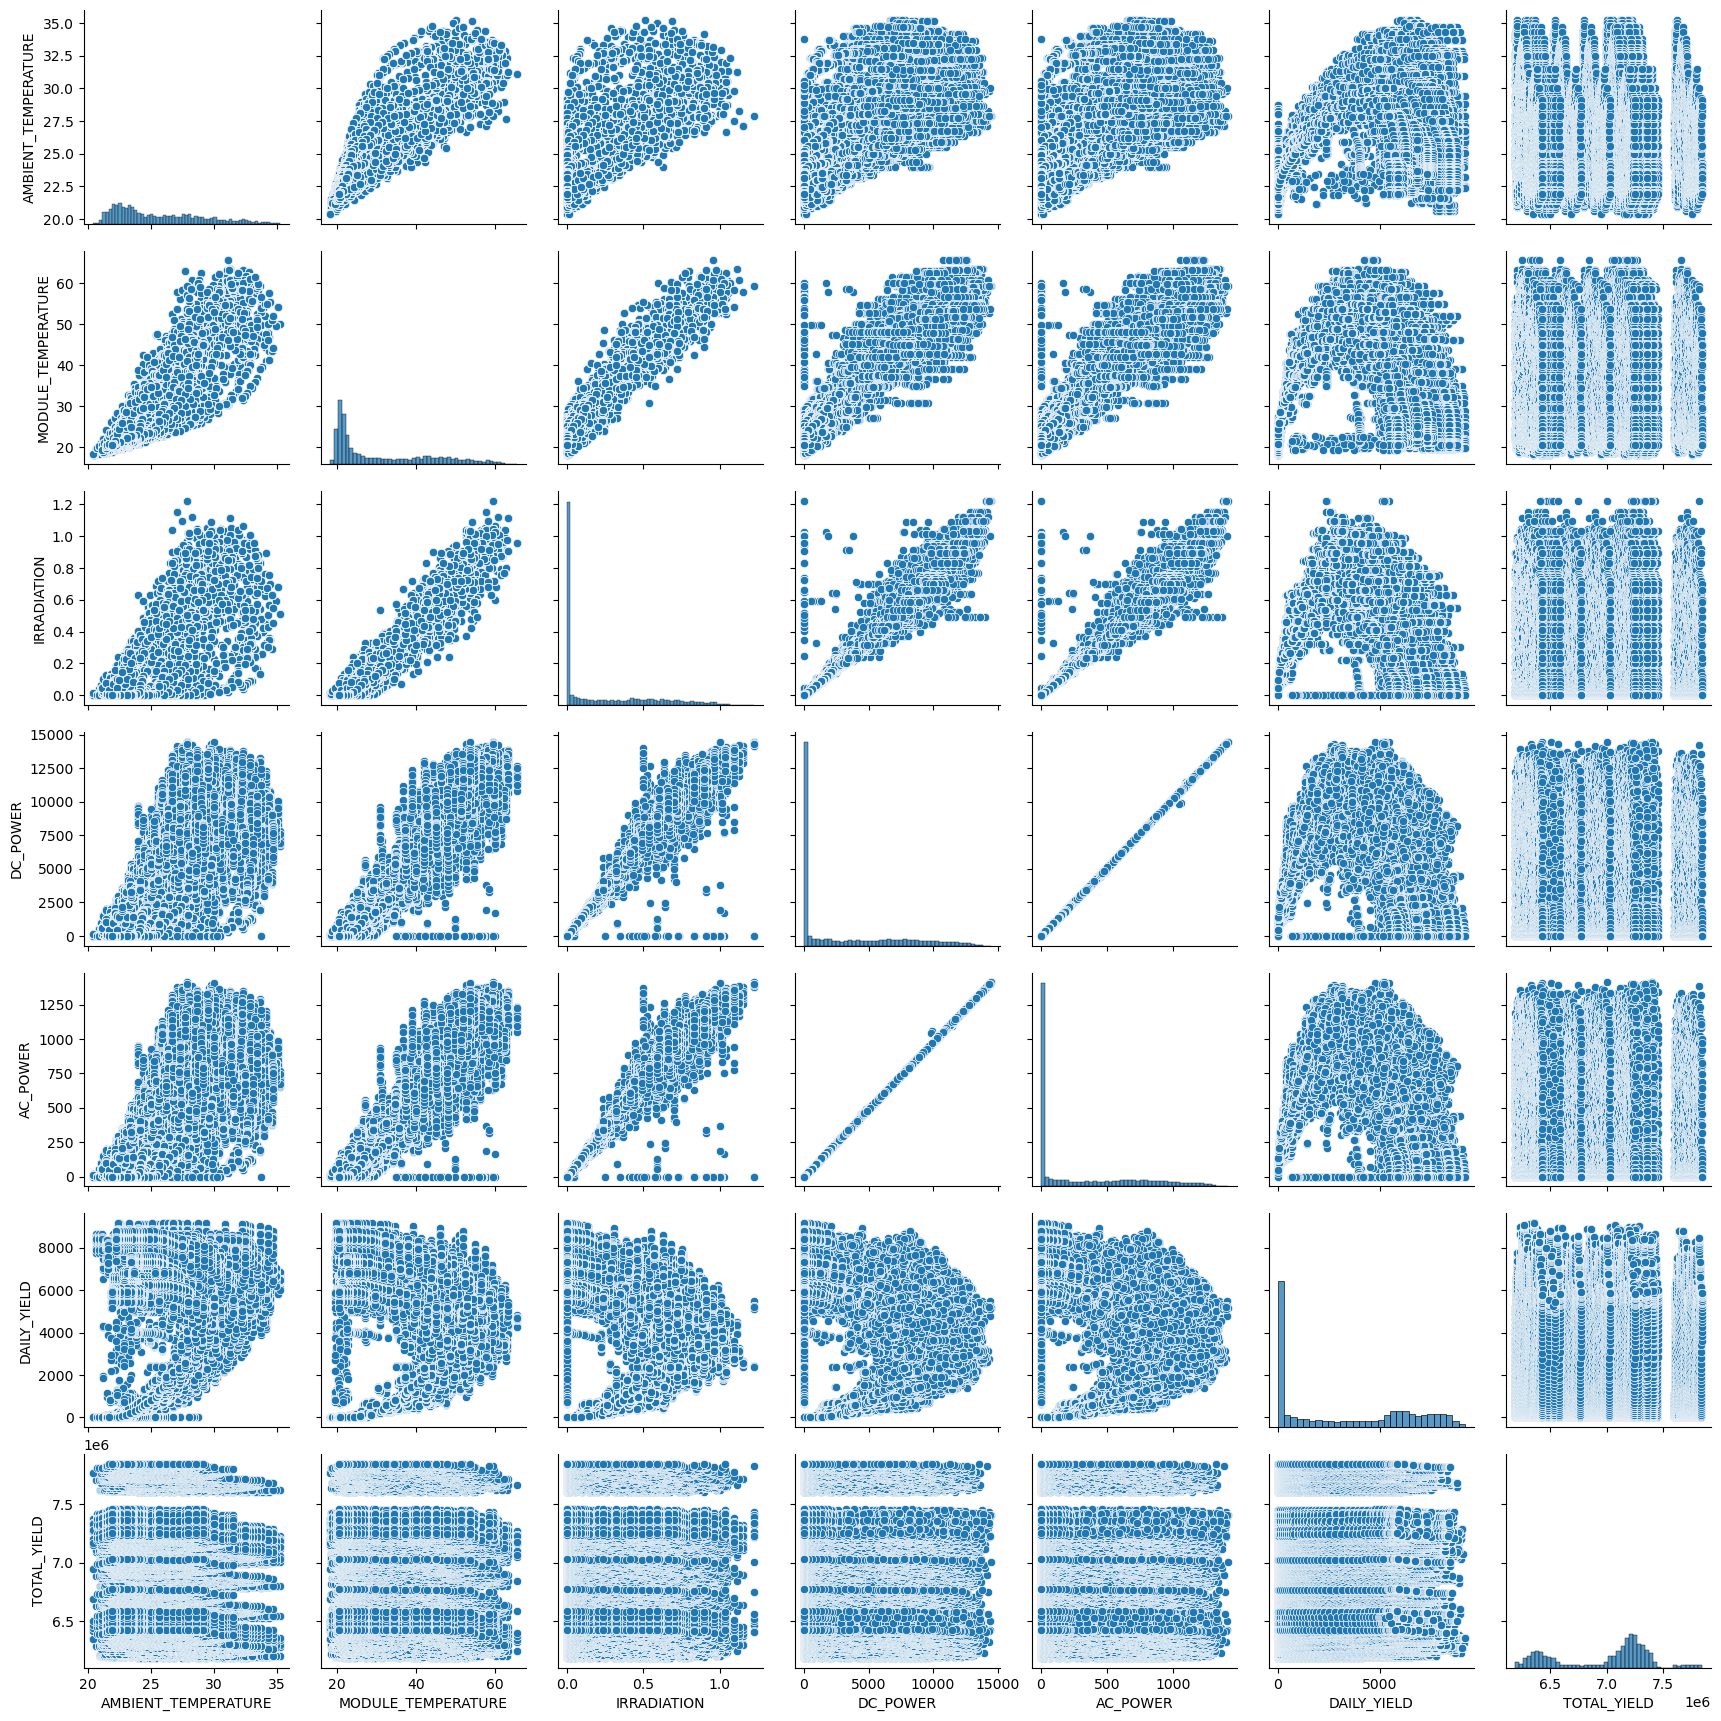

In [18]:
sns.pairplot(clean_dataset)

array([[<AxesSubplot:title={'center':'AMBIENT_TEMPERATURE'}>,
        <AxesSubplot:title={'center':'MODULE_TEMPERATURE'}>,
        <AxesSubplot:title={'center':'IRRADIATION'}>],
       [<AxesSubplot:title={'center':'DC_POWER'}>,
        <AxesSubplot:title={'center':'AC_POWER'}>,
        <AxesSubplot:title={'center':'DAILY_YIELD'}>],
       [<AxesSubplot:title={'center':'TOTAL_YIELD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

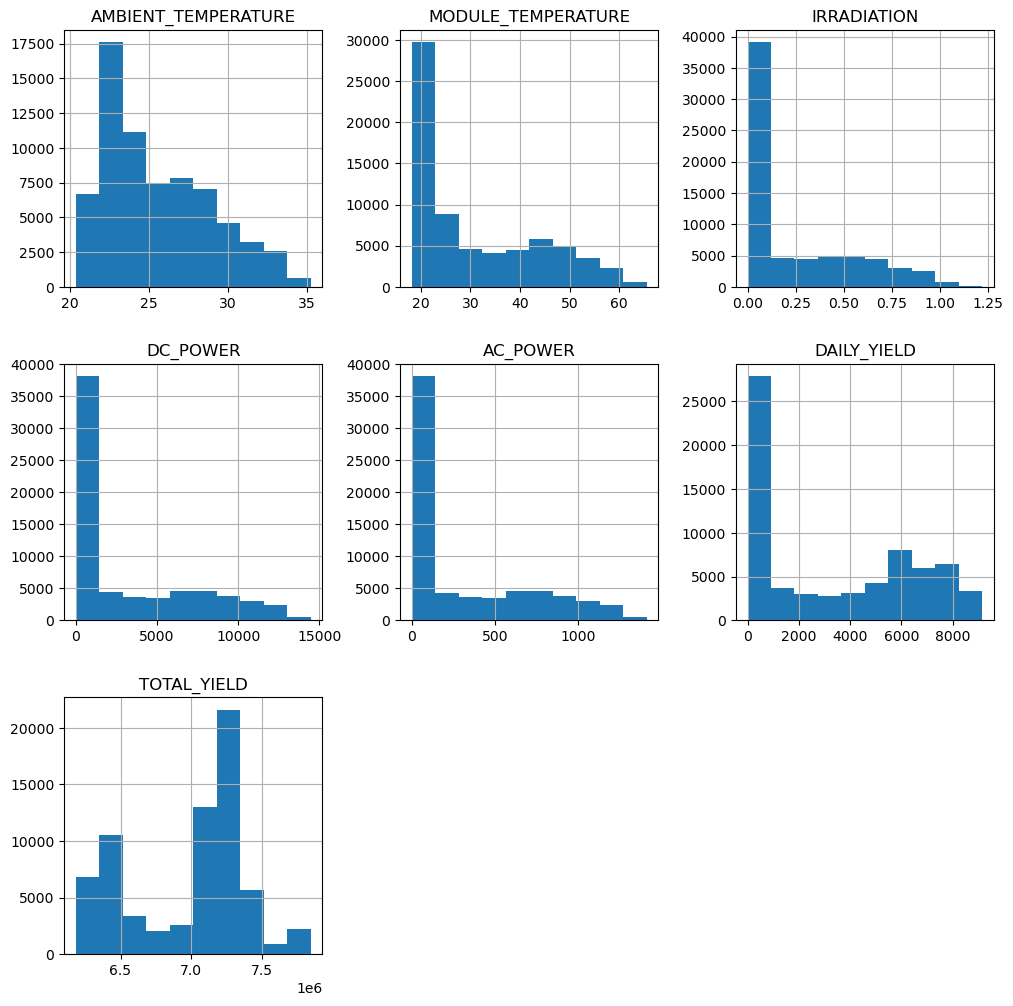

In [12]:
clean_dataset.hist(figsize=(12, 12))

['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']


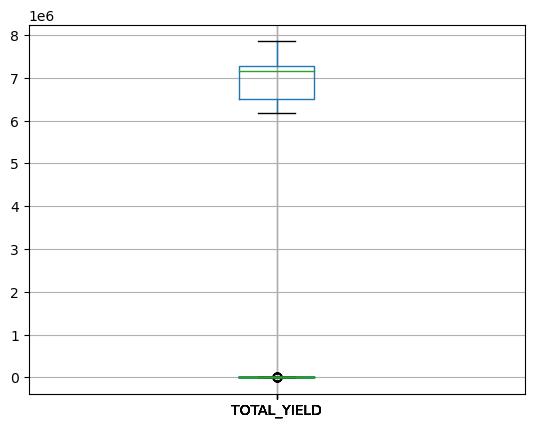

In [13]:
import matplotlib as plt

column_names = list(clean_dataset.columns.values)

column_names.remove('DATE_TIME')

print(column_names)

for i, el in enumerate(column_names):
    clean_dataset.boxplot(el)

# Primera prueba de regresión

In [14]:
X = clean_dataset.drop(['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], axis=1).to_numpy()

y = clean_dataset.drop(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], axis=1).to_numpy()[:, 0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Para la primera prueba ni siquiera normalizo los datos

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"r2 = {r2}")

r2 = 0.9800288894346422


El r2 score es muy bueno, de 0.98. Es casi 1. Esto es porque los datos estan muy correlacionados.

## Intentar hacer predicciones por cada hora

In [19]:
full_dataset.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


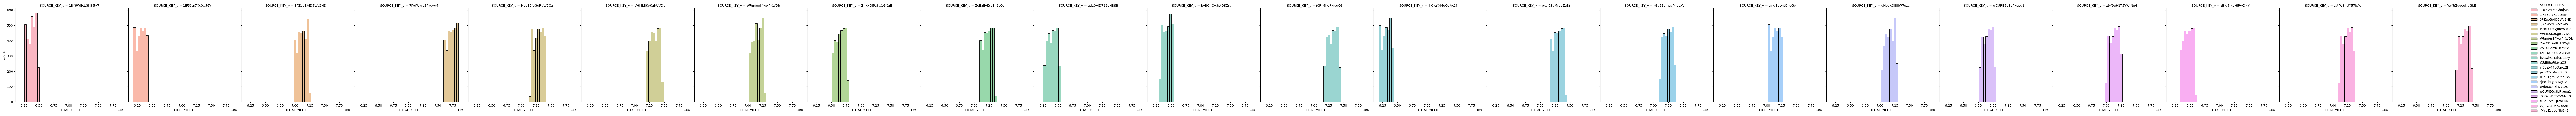

In [23]:
sns.displot(full_dataset, x='TOTAL_YIELD', hue='SOURCE_KEY_y', col='SOURCE_KEY_y')

In [25]:
dataset_to_aggregate = full_dataset.copy()
dataset_to_aggregate['DATE_TIME'] = pd.to_datetime(dataset_to_aggregate['DATE_TIME']).dt.strftime('%Y-%m-%d %H')
dataset_to_aggregate.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [51]:
gbo = dataset_to_aggregate.groupby(by=['DATE_TIME', 'SOURCE_KEY_y'], axis=0, as_index= False)
aggregated = pd.DataFrame()
aggregated['DATE_TIME'] = gbo['DATE_TIME'].first()['DATE_TIME']
aggregated['SOURCE_KEY_y'] = gbo['SOURCE_KEY_y'].first()['SOURCE_KEY_y']
aggregated['MIN_AMBIENT_TEMPERATURE'] = gbo['AMBIENT_TEMPERATURE'].min()['AMBIENT_TEMPERATURE']
aggregated['MAX_AMBIENT_TEMPERATURE'] = gbo['AMBIENT_TEMPERATURE'].max()['AMBIENT_TEMPERATURE']
aggregated['MEAN_AMBIENT_TEMPERATURE'] = gbo['AMBIENT_TEMPERATURE'].mean()['AMBIENT_TEMPERATURE']
aggregated['MIN_IRRADIATION'] = gbo['IRRADIATION'].min()['IRRADIATION']
aggregated['MAX_IRRADIATION'] = gbo['IRRADIATION'].max()['IRRADIATION']
aggregated['MEAN_IRRADIATION'] = gbo['IRRADIATION'].mean()['IRRADIATION']

aggregated['MEAN_DC_POWER'] = gbo['DC_POWER'].mean()['DC_POWER']
aggregated['MEAN_AC_POWER'] = gbo['AC_POWER'].mean()['AC_POWER']
aggregated['TOTAL_YIELD'] = gbo['TOTAL_YIELD'].min()['TOTAL_YIELD']

aggregated

,DATE_TIME,SOURCE_KEY_y,MIN_AMBIENT_TEMPERATURE,MAX_AMBIENT_TEMPERATURE,MEAN_AMBIENT_TEMPERATURE,MIN_IRRADIATION,MAX_IRRADIATION,MEAN_IRRADIATION,MEAN_DC_POWER,MEAN_AC_POWER,TOTAL_YIELD
0,2020-05-15 00,1BY6WEcLGh8j5v7,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,6259559.0
1,2020-05-15 00,1IF53ai7Xc0U56Y,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,6183645.0
2,2020-05-15 00,3PZuoBAID5Wc2HD,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,6987759.0
3,2020-05-15 00,7JYdWkrLSPkdwr4,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,7602960.0
4,2020-05-15 00,McdE0feGgRqW7Ca,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...
17432,2020-06-17 23,uHbuxQJl8lW7ozc,21.909288,22.129816,22.004218,0.0,0.0,0.0,0.0,0.0,7287002.0
17433,2020-06-17 23,wCURE6d3bPkepu2,21.909288,22.129816,22.004218,0.0,0.0,0.0,0.0,0.0,7028601.0
17434,2020-06-17 23,z9Y9gH1T5YWrNuG,21.909288,22.129816,22.004218,0.0,0.0,0.0,0.0,0.0,7251204.0
17435,2020-06-17 23,zBIq5rxdHJRwDNY,21.909288,22.129816,22.004218,0.0,0.0,0.0,0.0,0.0,6583369.0


In [52]:
sorted_df = aggregated.sort_values(by=['SOURCE_KEY_y', 'DATE_TIME'])
sorted_df

,DATE_TIME,SOURCE_KEY_y,MIN_AMBIENT_TEMPERATURE,MAX_AMBIENT_TEMPERATURE,MEAN_AMBIENT_TEMPERATURE,MIN_IRRADIATION,MAX_IRRADIATION,MEAN_IRRADIATION,MEAN_DC_POWER,MEAN_AC_POWER,TOTAL_YIELD
0,2020-05-15 00,1BY6WEcLGh8j5v7,24.846130,25.184316,25.012697,0.0,0.0,0.0,0.0,0.0,6259559.0
21,2020-05-15 01,1BY6WEcLGh8j5v7,24.536092,24.873022,24.667328,0.0,0.0,0.0,0.0,0.0,6259559.0
43,2020-05-15 02,1BY6WEcLGh8j5v7,24.936930,25.012248,24.986837,0.0,0.0,0.0,0.0,0.0,6259559.0
64,2020-05-15 03,1BY6WEcLGh8j5v7,24.879100,25.016309,24.954589,0.0,0.0,0.0,0.0,0.0,6259559.0
85,2020-05-15 04,1BY6WEcLGh8j5v7,24.013224,24.678902,24.276670,0.0,0.0,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...,...,...,...,...,...
17348,2020-06-17 19,zVJPv84UY57bAof,23.051322,23.489280,23.367776,0.0,0.0,0.0,0.0,0.0,7363272.0
17370,2020-06-17 20,zVJPv84UY57bAof,22.887429,23.003263,22.918254,0.0,0.0,0.0,0.0,0.0,7363272.0
17392,2020-06-17 21,zVJPv84UY57bAof,22.892598,23.137091,22.981533,0.0,0.0,0.0,0.0,0.0,7363272.0
17414,2020-06-17 22,zVJPv84UY57bAof,22.150570,22.563179,22.271179,0.0,0.0,0.0,0.0,0.0,7363272.0


In [53]:
sub_dataframes = [y for x, y in sorted_df.groupby('SOURCE_KEY_y')]

In [61]:
processed_sub_dataframes = []
for sub_df in sub_dataframes:
    sub_df = sub_df.sort_values(by='DATE_TIME')
    sub_df['HOURLY_YIELD'] = sub_df['TOTAL_YIELD'] - sub_df['TOTAL_YIELD'].shift(1)
    sub_df = sub_df.iloc[1:, :]
    processed_sub_dataframes.append(sub_df)

sub_df.head()

,DATE_TIME,SOURCE_KEY_y,MIN_AMBIENT_TEMPERATURE,MAX_AMBIENT_TEMPERATURE,MEAN_AMBIENT_TEMPERATURE,MIN_IRRADIATION,MAX_IRRADIATION,MEAN_IRRADIATION,MEAN_DC_POWER,MEAN_AC_POWER,TOTAL_YIELD,HOURLY_YIELD
42,2020-05-15 01,zVJPv84UY57bAof,24.536092,24.873022,24.667328,0.0,0.000000,0.000000,0.0,0.0,7116151.0,0.0
63,2020-05-15 02,zVJPv84UY57bAof,24.936930,25.012248,24.986837,0.0,0.000000,0.000000,0.0,0.0,7116151.0,0.0
84,2020-05-15 03,zVJPv84UY57bAof,24.879100,25.016309,24.954589,0.0,0.000000,0.000000,0.0,0.0,7116151.0,0.0
106,2020-05-15 04,zVJPv84UY57bAof,24.013224,24.678902,24.276670,0.0,0.000000,0.000000,0.0,0.0,7116151.0,0.0
128,2020-05-15 05,zVJPv84UY57bAof,24.177106,24.328727,24.274983,0.0,0.000863,0.000216,0.0,0.0,7116151.0,0.0


In [63]:
final_dataframe = pd.concat(processed_sub_dataframes, axis=0)
final_dataframe

,DATE_TIME,SOURCE_KEY_y,MIN_AMBIENT_TEMPERATURE,MAX_AMBIENT_TEMPERATURE,MEAN_AMBIENT_TEMPERATURE,MIN_IRRADIATION,MAX_IRRADIATION,MEAN_IRRADIATION,MEAN_DC_POWER,MEAN_AC_POWER,TOTAL_YIELD,HOURLY_YIELD
21,2020-05-15 01,1BY6WEcLGh8j5v7,24.536092,24.873022,24.667328,0.0,0.000000,0.000000,0.0,0.0,6259559.0,0.0
43,2020-05-15 02,1BY6WEcLGh8j5v7,24.936930,25.012248,24.986837,0.0,0.000000,0.000000,0.0,0.0,6259559.0,0.0
64,2020-05-15 03,1BY6WEcLGh8j5v7,24.879100,25.016309,24.954589,0.0,0.000000,0.000000,0.0,0.0,6259559.0,0.0
85,2020-05-15 04,1BY6WEcLGh8j5v7,24.013224,24.678902,24.276670,0.0,0.000000,0.000000,0.0,0.0,6259559.0,0.0
107,2020-05-15 05,1BY6WEcLGh8j5v7,24.177106,24.328727,24.274983,0.0,0.000863,0.000216,0.0,0.0,6259559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17348,2020-06-17 19,zVJPv84UY57bAof,23.051322,23.489280,23.367776,0.0,0.000000,0.000000,0.0,0.0,7363272.0,18.0
17370,2020-06-17 20,zVJPv84UY57bAof,22.887429,23.003263,22.918254,0.0,0.000000,0.000000,0.0,0.0,7363272.0,0.0
17392,2020-06-17 21,zVJPv84UY57bAof,22.892598,23.137091,22.981533,0.0,0.000000,0.000000,0.0,0.0,7363272.0,0.0
17414,2020-06-17 22,zVJPv84UY57bAof,22.150570,22.563179,22.271179,0.0,0.000000,0.000000,0.0,0.0,7363272.0,0.0
